In [1]:
%matplotlib inline

# Classification of Handwritten Digits

## Data Mining Team Names:
David Samuel,
James Hancock,
Alexandra Fisher, 
and Remy Lagrois

This notebook will explore a number of different models to classify the MNIST Handwritten Dataset.  You can get started with the dataset and benchmarks at https://www.kaggle.com/c/digit-recognizer.  

We will use the CRISP-DM framework seen below to iterate the data processing and modeling.  You can get a breif overview here: https://en.wikipedia.org/wiki/Cross_Industry_Standard_Process_for_Data_Mining

<a title="By Kenneth Jensen (Own work) [CC BY-SA 3.0 (http://creativecommons.org/licenses/by-sa/3.0)], via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File%3ACRISP-DM_Process_Diagram.png"><img width="384" alt="CRISP-DM Process Diagram" src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/b9/CRISP-DM_Process_Diagram.png/512px-CRISP-DM_Process_Diagram.png"/></a>

<a id='table_of_contents'></a>
### Table of Contents
 [Business Understanding](#business_understanding)
 [Data Understanding](#data_understanding)
   - [Fig 1. Digit Frequency](#digit_frequency)  
 [Data Preparation](#data_preparation)          

[Logistic Regression](#logistic_regression)
  - [Cost Exploration](#cost_exploration)          
  - [Weights](#weights)    
  - [Pipeline](#pipeline) 

[Support Vector Machine](#support_vector_machine)                         
  - [Linear kernel](#linear_kernel)          
  - [Radial Basis Function (RBF) kernel](#rbf_kernel)    
  - [Third degree polynomial kernel](#polynomial_kernel)  
  - [Sigmoid kernel](#sigmoid_kernel)  

<a id='table_of_contents'></a>
## Table of Contents

<a id='business_understanding'></a>
[Business Understanding](#business_understanding)

[Data Understanding](#data_understanding)

   <a id='digit_frequency'></a>
   - [Fig 1. Digit Frequency](#digit_frequency)

    <a id='visualizing_distribution_freq_differences'></a>
    -[Visualizing Distribution of Differences in Frequencies of Split](#visualizing_distribution_freq_differences)
    
    <a id='class_distribution'></a>
    - [Class Distribution](#class_distribution)


<a id='data_preparation'></a>
[Data Preparation](#data_preparation)


<a id='final_dataset_description'></a>
[Final Dataset Description](#final_dataset_description)


<a id='Modeling and Evaluation'></a>
[Modeling and Evaluation](#modeling_and_evaluation)



### First Model



### Second Model



### Third Model



- [Preprocessing](#preprocessing_data)

[Logistic Regression](#logistic_regression)

   - [Cost Exploration](#cost_exploration)
   - [Weights](#weights)
   - [Pipeline](#pipeline)


[Support Vector Machine](#support_vector_machine)     


  - [Linear Kernel](#linear_kernel)
  
  - [Radial Basis Function (RBF) Kernel](#rbf_kernel)    
  
  - [Third Degree Polynomial Kernel](#polynomial_kernel)  
 
  - [Sigmoid Kernel](#sigmoid_kernel)  

### The Big Picture

[Understanding of Model Outcomes](#understanding_model_outcomes) 



[Deployment & Future Outlook](#deployment_future_outlook)

[Future Uses & Recommendations](#future_uses_recommendations)
  
  #### Illustrating the recursive nature of a data mining project and relationships between phases.

<a id='business_understanding'></a>
## Business Understanding 

This dataset was released and licensed for use in academia, and a purely knowledge based Kaggle competition which started in July, 2012, and will conclude at New Years Eve December, 2016.

The data was taken from the MNIST ("Modified National Institute of Standards and Technology").  This data has been extensively studied, which makes it an ideal candidate for learning machine learning techniques, repeatablility of testing, and new learning methodology.

The goal of the competition is to correctly classify the handwritten digits 0 through 9.  It is our job to process the image data, train a model using the training data, predict the labels of the test set, and report the accuracy.  We will iterate on this methodology through the use of various machine learning algorithms, and data transformations. 

<a id='data_understanding'></a>
## Data Understanding

This dataset is comprised of a training set of 42,000 labeled images, and 28,000 test images.  These images are each unique, and each contains 784 pixels, 0 through 255 representing a greyscale pixel.  The training set is labeled with the correct digit in the set of (0 through 9), while the testing set is unlabeled.  

In [2]:
# http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html#pandas.read_csv
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.html

import pandas as pd   # import pandas library as a variable, "pd"
import numpy as np    # import numpy library as "np"

print("Importing...")
# create data frame of training and testing sets

test = pd.read_csv("data/test.csv")              #  Sets testing object as a DataFrame
dataset = pd.read_csv("data/train.csv")             #  Set training object as a DataFrame
target = dataset[[0]].values.ravel()                #  Set target as the label values flattened to an ndarray(N-dimensional Array)                                            
train = dataset.iloc[:,1:].values                   #  Set train as the pixel values

print("Done!...")

Importing...
Done!...


## Here's a sample of the digits from Kaggle:
<img src="https://kaggle2.blob.core.windows.net/competitions/kaggle/3004/logos/front_page.png" alt="Drawing" style="width: 400px;"/>

<a id='digit_frequency'></a>
## Class Distribution
The below graph shows the frequency of which each of the digits occured in the data set. This is important to help determine what numbers occurred the most often.

Size of the training dataset: 42000 Rows and 785 Columns
Size of the testing dataset: 28000 Rows and 784 Columns
Number of unique classes: 10
The Classes: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


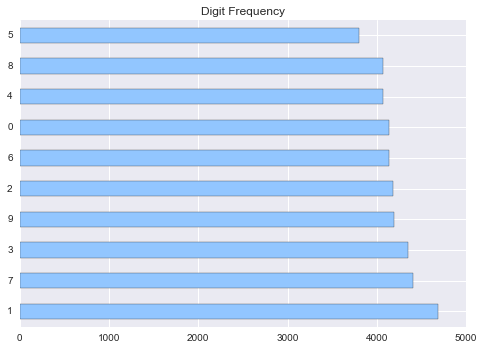

In [3]:
# http://seaborn.pydata.org/generated/seaborn.set.html?highlight=seaborn.set#seaborn.set

# seaborn.set(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=False, rc=None)
import matplotlib.pyplot as plt
import seaborn as sns       # import the seaborn library for a quick distribution plot
sns.set(color_codes=True)       # Reset color_codes to default

print 'Size of the training dataset:', dataset.shape[0], 'Rows and', dataset.shape[1], 'Columns'  #shape[0,1] = row, col
print 'Size of the testing dataset:', test.shape[0], 'Rows and', test.shape[1], 'Columns'
print 'Number of unique classes:', len(dataset.label.unique())
labels = sorted(dataset.label.unique())                              #sort unique labels
print 'The Classes:', labels
sns.set(style='darkgrid', palette='pastel')       # Set grid style and color palette of seaborn object
c = pd.Series(target)                             # Create a series of the target labels
c = c.value_counts()                              # Set value_counts for the classes
sns = c.plot(title="Digit Frequency", kind='barh')  # set seaborn object equal to Series.plot object and it will plot automatically
plt.show()                                        # Show plot cleanly



### The plot above shows the distribution of the labeled classes in the training Set
We can see from the graph above that the most common digit is 1 and occurs just under 5000 times. this will be taken into account in later sections.

<a id='data_preparation'></a>
## Data Preparation

### Split the data into training and testing and show the distribution of the split
Now the data set must be split in order to help determine how the distribution would correlate to the cross validation test. the grap below shows the output.

In [4]:

from sklearn.model_selection import train_test_split  # We will try the method train_test_split instead of ShuffleSplit

print("Importing...")
# create data frame of training and testing sets
trains = pd.read_csv("data/train.csv")
y = trains[[0]].values.ravel()
X = trains.iloc[:,1:].values

print("splitting...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)  # create x and y training set



Importing...
splitting...


In [5]:
# Create plotter for train_test_split to visualize distributions of multiple sets at once
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(color_codes=True)

def splitter_display(train, test):
    sns.color_palette("Blues")
    sns.color_palette("husl", 8)
    sns.set_style("whitegrid", {'axes.grid' : False})
  
    ax = sns.distplot(train, bins=10, hist=True, kde=False)      # Set matplotlib object ax = distribution plot of train and test 
    ax = sns.distplot(test, bins=10, hist=True, kde=False)
    ax.set(title="Train Set vs. Cross Validation Test Set", xlabel='Digit Class', ylabel='Frequency in Set', xticks=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

    plt.show() 

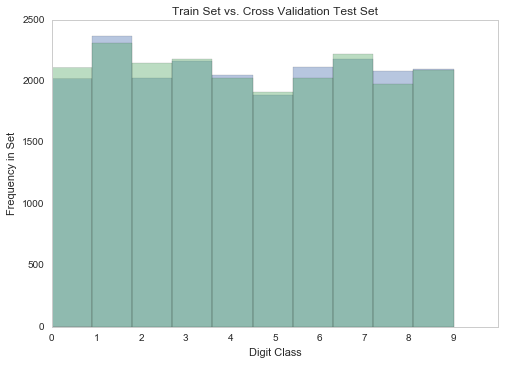

In [6]:
splitter_display(y_train, y_test)

### The Plot above shows differences in frequencies of the split in colored sections.  If the distribution appears normal, then it is ready for testing.

### The frequency of the split looks normal, ie. no noticable difference in color distribution above the bars.  

Note: This may not need to be run each time, as the train_test_split ensures a balanced class distribution

# Describe Final Dataset

In [7]:
# import pandas as pd   # import pandas library as a variable, "pd"
# import numpy as np    # import numpy library as "np"

# print("Importing...")
# # create data frame of training and testing sets

# test = pd.read_csv("data/test.csv")              #  Sets testing object as a DataFrame
# dataset = pd.read_csv("data/train.csv")             #  Set training object as a DataFrame
# target = dataset[[0]].values.ravel()                #  Set target as the label values flattened to an ndarray(N-dimensional Array)                                            
# train = dataset.iloc[:,1:].values                   #  Set train as the pixel values

# print("Done!...")


In [8]:
# import matplotlib.pyplot as plt
# import matplotlib.cm as cm

# # convert to array, specify data type, and reshape
# targets = target.astype(np.uint8)
# trains = np.array(train).reshape((-1, 1, 28, 28)).astype(np.uint8)
# tests = np.array(test).reshape((-1, 1, 28, 28)).astype(np.uint8)

# plt.imshow(trains[1729][0], cmap=cm.binary) # draw the picture

# plt.show()

# Below we plot the various number plots in order to show what the images actually look like. 
It is determined that a few of the variables may be hard to distinguish or not compeltely obvious when given the picture alone.

In [9]:
%matplotlib inline
# The function below plots the images with their labels above
# Code sampled from ../03.%20Dimension%20Reduction.ipynb

import matplotlib.pyplot as plt    #import pylab library which is suited for plotting images

# Set X and y to plot
X = train
y = target
names = np.sort(dataset.label.unique())     # Created sorted labels array to match titles with images
done = set()                                # Create and empty set of explored indices

#  Create function to plot single digit of interest
def plot_now(images, h=28, w=28, cmap=plt.cm.binary, indx=True, r=0):    # Set default constructor values  
    plt.imshow(images.reshape((h, w)), cmap=cmap)                        # Reshape images and set cmap color
    if indx==True:
        plt.xlabel('index: '+str(r), size=12)                  # Option to show index
        plt.title(names[y][r], size=16)                                      # Sets title from sorted names [y] and index [r] 
    plt.xticks(())                              # Eliminate tick marks
    plt.yticks(())

#  Create function to plot a gallery of interest
def plot_gallery(images, titles,  h=28, w=28, n_row=3, x=1.7, y=2.3, n_col=6, 
                 cmap=plt.cm.binary, random=True, indx=True, r=0, size=16):  
    # Optional row and size parameters will allow us to reuse code, set random to false and r to an index of your choice
    # to see a continous gallery

    plt.figure(figsize=(x * n_col, y * n_row))                          # Set figure size as a ratio of rows
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35) # Adjust spacing of subplots
    for i in range(n_row * n_col):                                         # Adjust spacing of subplots
        move=True                  # logical to move on if a random int is found not in the done set()                                       
        while random and move:      
            r=(np.random.randint(len(images)-(n_row*n_col)-1))          # Create a random integer no greater than the size of the set, and gallery
            if r not in done:                                        # if integer has not been used 
                done.add(r+i)
            move=False          # Optional randomization to explore sets
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i+r].reshape((h, w)), cmap=cmap)
        if indx==True:plt.xlabel('index: '+str(i+r), size=12)
        plt.title(titles[i+r], size=size)
        plt.xticks(())
        plt.yticks(())




### Using the plot_now function we can now plot a random gallery, or an individual image or array of images plot_now() function will plot a single digit.

Now that the pictures are more obvious with a more distinguishable color scale it can be dertemined that the centers and edges are more well defined

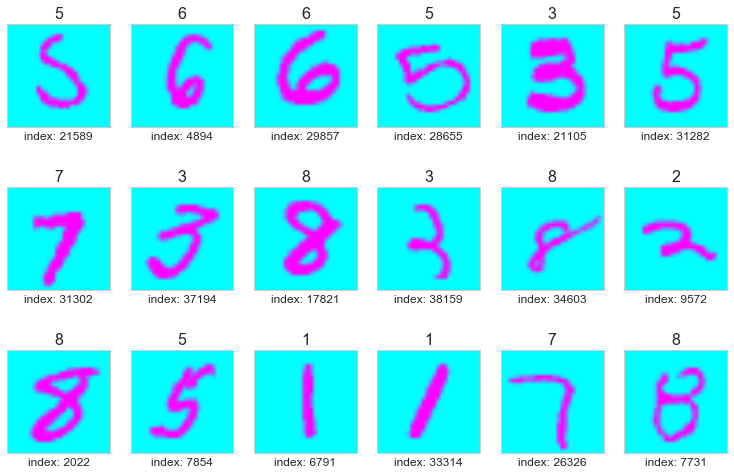

In [10]:
plot_gallery(X, names[y], 28, 28, indx=True, random=True, r=21400, cmap=plt.cm.cool)

# The color scheme more clearly defines the centers and edges of the shapes, as well as blobs.
Now that the pictures are more obvious with a more distinguishable color scale it can be dertemined that the centers and edges are more well defined

In [11]:
# mask the black pixels
black = np.ma.masked_where(X <= 230, X)

# black = black.compressed()
blacks = black.reshape(42000, 784).astype(np.uint8).ravel()

# Now take a closer look at an image of interest

IOError: [Errno 2] No such file or directory: 'img/24851.png'

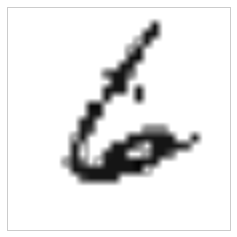

In [12]:
weird = set()  # empty set of strange images
N=24851       #
plot_now(black[N], cmap=plt.cm.binary, indx=False, r=N)
plt.savefig('img/'+str(N)+'.png', transparent=True, bbox_inches='tight', pad_inches=-0.15) # Save image

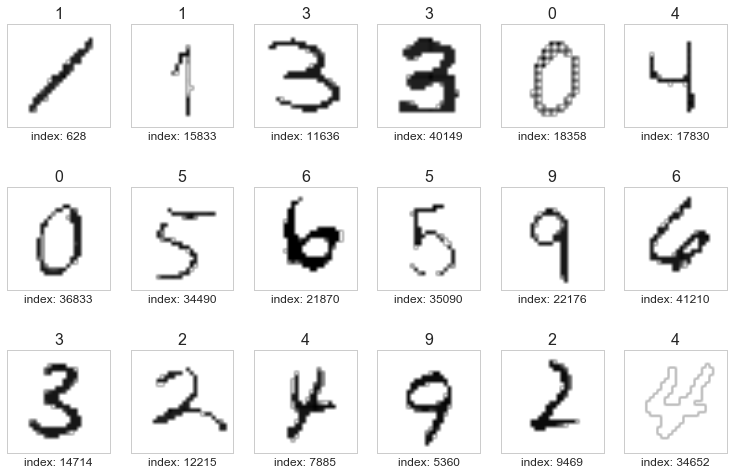

In [13]:
plot_gallery(black, names[y],  h=28, w=28, n_row=3, x=1.7, y=2.3, n_col=6, 
                 cmap=plt.cm.binary, random=True, indx=True, r=0, size=16)

### Above are the images recreated from the mask at levels of black above 230, as you can see the images have become very simplified, in some cases, over-lossy

In [ ]:
# Masking Reference

# import numpy as np
# import matplotlib.pyplot as plt
# import matplotlib.cm as cm

# # Generate some data...
# gray_data = X

# masked_data = np.random.random((100,100))
# masked_data = np.ma.masked_where(masked_data < 0.9, masked_data)

# # Overlay the two images
# fig, ax = plt.subplots()
# ax.imshow(gray_data, cmap=cm.gray)
# ax.imshow(masked_data, cmap=cm.jet, interpolation='none')
# plt.show()

# Modeling and Evaluation
The next necessary function for this data set is to determine which of the components are most important. To do this a PCA is performed. 

In [14]:
# Let's try reducing dimensionality with PCA to 50 components 
# as we have seen from the eigenvectors from lab 1, 50 should be sufficient

# http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA.fit_transform

# sklearn.decomposition.PCA(n_components=None, copy=True, whiten=False, 
# svd_solver='auto', tol=0.0, iterated_power='auto', random_state=None)

from scipy import stats, integrate
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
from sklearn.decomposition import PCA

print("Fitting PCA...")
n_comp = 50

# whitening was recommended, as well as arpack solver

pca = PCA(n_components=n_comp, whiten=True, svd_solver='auto')

# Set fitted PCA object
trainer = pca.fit_transform(X_train)
tester = pca.fit_transform(X_test)
blackpca = pca.fit_transform(black)
print("Done!")



Fitting PCA...
Done!


### Take a look at colormapping guide

http://matplotlib.org/users/colormaps.html

In [15]:
 def pca_plot(X, n_comp, svd_solver='auto', cmap=plt.cm.viridis, scaler=1.0):  
    pca=PCA(n_components=50, whiten=True, svd_solver='auto')
    pca.fit_transform(X)
    eigendigits = pca.components_.reshape((n_comp, 28, 28))
    eigendigit_titles = ["eigendigit %d" % i for i in range(eigendigits.shape[0])]
    plot_gallery(eigendigits, eigendigit_titles, n_row=int(np.floor(np.sqrt(n_comp))), 
                 n_col=int(np.ceil(np.sqrt(n_comp))), x=(1.7*scaler), y=(2.3*scaler), 
                 indx=False, random=False, cmap=cmap, size=(16*scaler))

IndexError: index 50 is out of bounds for axis 0 with size 50

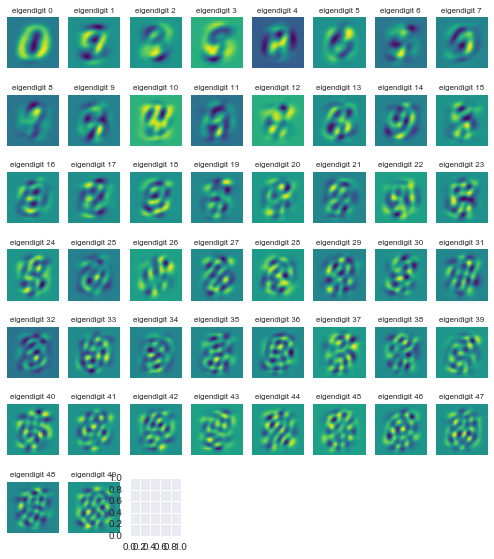

In [16]:
pca_plot(train, 50, svd_solver='auto', scaler=0.5)

### The above plot shows the numbers in yet another light.
It is muchharder to determine the number from this plot as the edges are very poorly defined

In [18]:
evr = pca.explained_variance_ratio_
print sum(evr), "Percent Variance Explained by", n_comp, 'PCs'

# Create cumulative series to plot
cum = 0
d = []
evr = pca.explained_variance_ratio_

for i in range(50):  
    cum += evr[i]
    d.append(cum)

print("Done!")



0.825534015065 Percent Variance Explained by 50 PCs
Done!


From the output output we  can see that the variance is explained by the top 50 principal components, which is a fairly large percentage.

In [20]:
black = pca.fit_transform(black)



In [21]:
pca_plot(20, svd_solver='auto', scaler=0.5)
evr = pca.explained_variance_ratio_
print sum(evr), "Percent Variance Explained by", n_comp, 'PCs'

# Create cumulative series to plot
cum = 0
d = []
evr = pca.explained_variance_ratio_

for i in range(50):  
    cum += evr[i]
    d.append(cum)

print("Done!")

TypeError: pca_plot() takes at least 2 arguments (3 given)

## Plotting the variance
We can see from the distibution chart below that neearly 80% of the variance is explaied by the top 40 and 65% of the variables are explained by the top 20 components

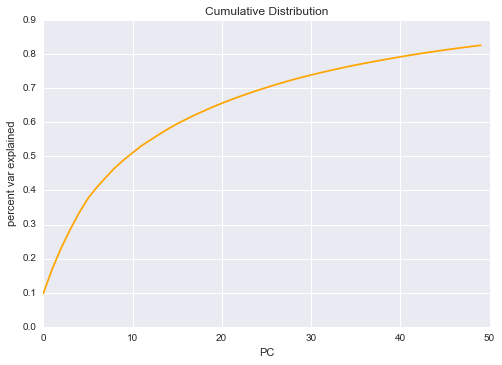

In [22]:
plt.plot(d, color='orange', label=True)
plt.title('Cumulative Distribution')
plt.xlabel('PC')
plt.ylabel('percent var explained')
plt.show()

In [23]:
# from the tutorial: http://www.kaggle.com/c/datasciencebowl/details/tutorial 
def multiclass_log_loss(y_true, y_pred, eps=1e-15):
    """Multi class version of Logarithmic Loss metric.
    https://www.kaggle.com/wiki/MultiClassLogLoss

    Parameters
    ----------
    y_true : array, shape = [n_samples]
            true class, integers in [0, n_classes - 1)
    y_pred : array, shape = [n_samples, n_classes]

    Returns
    -------
    loss : float
    """
    predictions = np.clip(y_pred, eps, 1 - eps)

    # normalize row sums to 1
    predictions /= predictions.sum(axis=1)[:, np.newaxis]

    actual = np.zeros(y_pred.shape)
    n_samples = actual.shape[0]
    actual[np.arange(n_samples), y_true.astype(int)] = 1
    vectsum = np.sum(actual * np.log(predictions))
    loss = -1.0 / n_samples * vectsum
    return loss
print("multiclass_log_loss() method loaded..")

multiclass_log_loss() method loaded..


From the below graph we can see that the accuracy of this PCA is around .83 which is respectable but not perfect. We can also see that the log loss from this method is about 5.6 and fairly consistent between the 2 tests.

In [24]:
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics as mt

dt_clf = DecisionTreeClassifier()

print 'Training Once:'
# train the decision tree algorithm
dt_clf.fit(X_train,y_train)
yhat = dt_clf.predict(X_test)
class_probabilities = dt_clf.predict_proba(X_test)

print 'Accuracy:', mt.accuracy_score(y_test,yhat)
print 'Log Loss:', multiclass_log_loss(y_test, class_probabilities)

n_comp = 50
pca = PCA(n_components=n_comp, whiten=True, svd_solver='auto')

print 'Training Once:'
# transform the data using pca
pca.fit_transform(X_train)

# train the decision tree algorithm
dt_clf.fit(X_train,y_train)
yhat = dt_clf.predict(X_test)
class_probabilities = dt_clf.predict_proba(X_test)

print 'Accuracy:', mt.accuracy_score(y_test,yhat)
print 'Log Loss:', multiclass_log_loss(y_test, class_probabilities)

Training Once:
Accuracy: 0.835142857143
Log Loss: 5.69396399425
Training Once:
Accuracy: 0.834666666667
Log Loss: 5.71041103063


# For the next function it was deteremined that we would have better results without using the PCA reduction with the decision tree classfier.
From the graph below we do see a higher log loss and lower accuracy when performing this decision tree classifier but that is expected.

For the below it was determined that we should only use the Gini criterion, as entropy is too sensitive for this type of image classification

Training Once:
Accuracy: 0.814142857143
Log Loss: 6.41927829854


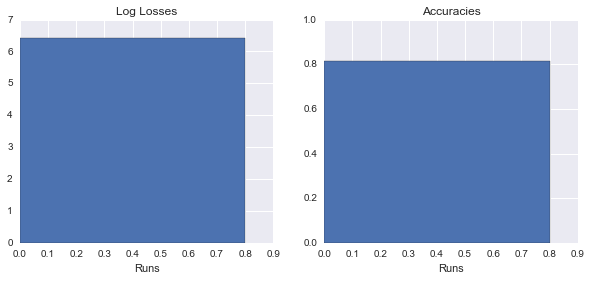

In [25]:
log_losses = []
accuracies = []
params = []

from matplotlib import pyplot as plt
%matplotlib inline

# how to make it generalize a bit better? 
# dt_clf = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2, 
#  min_samples_leaf=1, min_weight_fraction_leaf=0.0,
#  max_features=None, random_state=None, max_leaf_nodes=None, 
#  min_impurity_split=1e-07, class_weight=None, presort=False)
# defaults
dt_clf = DecisionTreeClassifier(criterion='gini', max_depth=None, 
                                min_samples_split=2, min_samples_leaf=1, 
                                max_features=None, max_leaf_nodes=None)

# # overwrite with prepruning methods
# dt_clf = DecisionTreeClassifier(criterion='entropy', max_depth=5, 
#                                 min_samples_split=1000, min_samples_leaf=1, 
#                                 max_leaf_nodes=None)


print 'Training Once:'

# transform the data using pca
pca.fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

# train the decision tree algorithm
dt_clf.fit(X_train,y_train)
yhat = dt_clf.predict(X_test)
class_probabilities = dt_clf.predict_proba(X_test)

# get accuracy and log loss of this training
acc = mt.accuracy_score(y_test,yhat)
ll = multiclass_log_loss(y_test, class_probabilities)
print 'Accuracy:', acc
print 'Log Loss:', ll

# save accuracy, log loss, and params of run
log_losses.append(ll)
accuracies.append(acc)
params.append(dt_clf.get_params())
    
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.bar(range(len(log_losses)),log_losses)
plt.title('Log Losses')
plt.xlabel('Runs')

plt.subplot(1,2,2)
plt.bar(range(len(accuracies)),accuracies)
plt.title('Accuracies')
plt.xlabel('Runs')
plt.ylim([0,1])

plt.show()

### We will now run PCA on Logistic Regression and SVM models, as we have learned from previous trials, reducing the dimensionality of the features will improve our model's predictive power.

In [26]:
# The function below plots a confusion matrix
#
from datetime import datetime as dt; start = dt.now()
print(__doc__)

import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
# # Create a DF from corr    
# conf = pd.DataFrame(conf)
# corr = conf.corr()

# # Generate a mask for the upper triangle
# mask = np.zeros_like(corr, dtype=np.bool)
# mask[np.triu_indices_from(mask)] = True

# # Set up the matplotlib figure
# f, ax = plt.subplots(figsize=(11, 9))

# # Generate a custom diverging colormap
# cmap = sns.diverging_palette(220, 10, as_cmap=True)

# # Draw the heatmap with the mask and correct aspect ratio
# # heatmap(data, vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=None, fmt='.2g', annot_kws=None, linewidths=0, 
# #         linecolor='white', 
# #         cbar=True, cbar_kws=None, cbar_ax=None, square=False, ax=None, xticklabels=True, yticklabels=True, mask=None, **kwargs)

# ax = sns.heatmap(corr)

Automatically created module for IPython interactive environment


Sag Solver...
Fitting Logit...


C:\Anaconda2\lib\site-packages\sklearn\linear_model\sag.py:286: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


predicting...
Accuracy is 15.8619047619 %
8 CPUs Ran in 0:01:23.418000 minutes
Confusion matrix, without normalization
[[1567    0   62   60   34  151  203   14    6   14]
 [   0   18    9  144  170   85   42 1598    6  243]
 [ 163    1  257  302  193  138    5  374  252  464]
 [  70   18  143  273  473   89  100  497  145  375]
 [  37  190  317  613   22  277   63    9  474   22]
 [ 135   17   47  145  100  367  642  127  150  180]
 [  98    0   22   94   72  804  364    7  442  122]
 [  58  124 1086  718    0   44    6   57  118    8]
 [  14    2  631  123  244   46  318   61  403  134]
 [  26  354  659  527    0  109  235   14  161    3]]
Probabilities [[  2.95205644e-11   8.63866100e-02   1.11984957e-03 ...,   3.99302837e-02
    9.99584289e-02   1.81077722e-02]
 [  1.99669881e-04   1.58496600e-05   2.83691884e-04 ...,   5.74030287e-06
    9.45203332e-02   3.04874489e-03]
 [  4.33498886e-07   2.48702490e-08   6.41947105e-01 ...,   1.79654212e-07
    3.11982959e-03   3.71594168e-04]


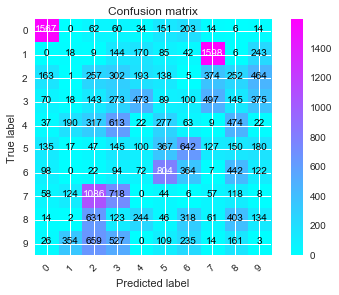

In [27]:
from datetime import datetime as dt
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics as mt
import multiprocessing
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

# http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression

# sklearn.linear_model.LogisticRegressionCV(Cs=10, fit_intercept=True, cv=None, dual=False, 
# penalty='l2', scoring=None, solver='lbfgs', tol=0.0001, max_iter=100, class_weight=None, 
# n_jobs=1, verbose=0, refit=True, intercept_scaling=1.0, multi_class='ovr', random_state=None)

start = dt.now()

skf = StratifiedKFold(n_splits=3, shuffle=False, random_state=None)
# l2 regulariazation only works with 'multinomial' and solvers: ‘sag’, and ‘lbfgs’
# using 10 fold cross validation

c = LogisticRegressionCV(Cs=10, fit_intercept=True, cv=skf, n_jobs=-1, penalty='l2', 
                              solver='sag', tol=0.00001, class_weight=None, 
                              verbose=0, refit=True, intercept_scaling=1.0, multi_class='multinomial')

# print 'maximum probability', [x for max(x) in prob]
print("Sag Solver...")
print("Fitting Logit...")
c.fit(trainer, y_train)

print("predicting...")
y_hat = c.predict(tester)

print 'Accuracy is', mt.accuracy_score(y_test,y_hat)*100, '%'

print multiprocessing.cpu_count(), 'CPUs Ran in', dt.now() - start, 'minutes' 

conf = mt.confusion_matrix(y_test,y_hat)
plot_confusion_matrix(conf, [x for x in range(10)],
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.cool)

prob = c.predict_proba(tester)
print 'Probabilities', prob
print 'maximum probability', np.max(prob)


### The plot above shows high confusion with the 6's and 0's respecitively.  Also, 7 and 1 have been highly confused.  
The 7 and 1 might be results of serious over fitting. Therefore further analysis is required.

lbfgs Solver...
Fitting Logit...
predicting...
Accuracy 15.8619047619 %
CPU Time:  0:00:25.067000
Confusion matrix, without normalization
[[1567    0   62   60   34  151  203   14    6   14]
 [   0   17    9  145  170   85   42 1598    6  243]
 [ 163    1  257  302  193  138    5  374  252  464]
 [  70   18  143  273  473   89  100  497  145  375]
 [  37  190  317  613   22  277   63    9  474   22]
 [ 134   17   47  145  101  367  642  127  150  180]
 [  98    0   22   94   72  804  364    7  442  122]
 [  58  123 1086  718    0   44    6   58  118    8]
 [  14    2  631  123  244   46  318   61  403  134]
 [  26  354  659  527    0  109  235   14  161    3]]
Probabilities [[  2.96694703e-11   8.58783813e-02   1.12034087e-03 ...,   3.99074857e-02
    9.99999532e-02   1.81186308e-02]
 [  1.99955297e-04   1.59079020e-05   2.83727077e-04 ...,   5.72501297e-06
    9.45185460e-02   3.04810667e-03]
 [  4.34577224e-07   2.51993937e-08   6.41867237e-01 ...,   1.79348566e-07
    3.11981489e-03

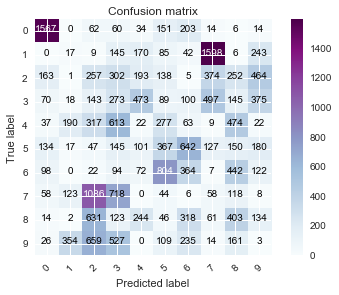

In [28]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
import numpy as np
from sklearn import metrics as mt

# Will try lbfgs
start = dt.now()

# http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression

c = LogisticRegressionCV(solver='lbfgs', cv=skf, penalty='l2', 
        multi_class='multinomial', tol=0.00001)


print("lbfgs Solver...")
print("Fitting Logit...")
c.fit(trainer, y_train)

print("predicting...")
y_hat = c.predict(tester)

print 'Accuracy', mt.accuracy_score(y_test,y_hat)*100, '%'

print 'CPU Time: ', dt.now() - start 

conf = mt.confusion_matrix(y_test,y_hat)
plot_confusion_matrix(conf, [x for x in range(10)],
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.BuPu)

prob = c.predict_proba(tester)
print 'Probabilities', prob
print 'maximum probability', np.max(prob)

## 'sag' solver and multinomial class wins at < 50 seconds with 37.00% accuracy and 10 fold cross validation.  The confusion Matrices show 

When the tests above were being performed it was realized that the data was possibly consistent of too many variables, as it took quite some time to perform the log regrssion and other features. With that it was determined that a PCA for dimension reduction would be of great use of tools for this project.

The code below is pulled from a Kaggler, and provides functions for a PCA and logistic regression model that is over 90% accurate.

Now it is time to plot the weights to show where the numbers might lie in determination of which attributes are most important when predicting. As stated presviouly this data set is a little odd in determination of variable selection however we can see that the pixels in the middle of the data set, show to a much greater extent where the possible future values may lie.

Below a pipeline is used to help to a greater extent which values are the largest determinents. A pipline essentially applies a list of transforms along with a final estimator. The final estimator only needs to implement fit. From this we can determine which of the variables is most vital for model creation. As shown in the output the values toward the middle of the pixel scale appear to be the most likely determininents which is to be expected as most of the items would be drawn centered arond the middle of the box.

# Support Vector Machines¶
Scaled attributes from the training and testing data are now used for investigating associated weights and support vectors. This is done by using support vector machines (SVMs) on the data and playing with the parameters.

In [29]:
import numpy as np
from sklearn.model_selection import train_test_split  # We will try the method train_test_split instead of ShuffleSplit

# set X and y, and testing data and normalize by 255.0 pixels

# try holding out the test set at 50/50
# random state can be changed, but will calibrate with 0
    
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)  # create x and y training set

print "Done Splitting."


Done Splitting.


# Next a third degree polynomial.
To try to improve the accuracy a third degree polynomial will be used

In [ ]:
# Reuse X and y from PCA from above
from datetime import datetime as dt

from sklearn.svm import SVC
from sklearn import metrics as mt

# (C=1.0, kernel='rbf', degree=3, gamma='auto', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, 
# class_weight=None, verbose=False, max_iter=-1, decision_function_shape=None, random_state=None)

# adding max_iter or balancing slows things down and hurts accuracy, so leave it at defaults, and


start = dt.now()
s = SVC(C=0.5, kernel='poly', degree=3, probability=True, tol=0.00001)
print("Training SVM..."), 
s.fit(trainer, y_train) 

print("Predicting...") 
y_hat = s.predict(tester) 

print 'Accuracy', mt.accuracy_score(y_test,y_hat)*100, '%'
time = dt.now() - start
print 'CPU Time: ', time


 
conf = mt.confusion_matrix(y_test,y_hat)
prob = c.predict_proba(tester)
print 'Probabilities', prob   
# Compute confusion matrix
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
conf = mt.confusion_matrix(y_test,y_hat)
plot_confusion_matrix(conf, [x for x in range(10)],
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Greens)

# # Plot normalized confusion matrix
# plt.figure()
# plot_confusion_matrix(conf, classes=class_names, normalize=True,
#                       title='Normalized confusion matrix')

plt.show()


Training SVM...

### The CM above shows confusion with 7--3, 3--9, 1--9 and particular trouble with 6;  it is possibly overfitting, C and tol could be turned down.  
Edge detection is possibly the best way to determine the best mix of parameters.

In [ ]:
# Linear Kernel with tolerance upped by order of magnitude
from datetime import datetime as dt

from sklearn.svm import SVC
from sklearn import metrics as mt

start = dt.now()
weights1 = {0:.05,1:.15, 2:0.05, 3:0.125, 4:0.125, 5:0.1, 6:0.1, 7:0.15, 8:0.1, 9:0.05}
s = SVC(C=0.5, kernel='linear', probability=True, tol=0.00001)
print("Training SVM..."), 
s.fit(trainer, y_train) 

print("Predicting...") 
y_hat = s.predict(tester) 

print 'Accuracy', mt.accuracy_score(y_test,y_hat)*100, '%'

print 'CPU Time: ', dt.now() - start

conf = mt.confusion_matrix(y_test,y_hat)
prob = c.predict_proba(tester)
print 'Probabilities', prob 

conf = mt.confusion_matrix(y_test,y_hat)
plot_confusion_matrix(conf, [x for x in range(10)],
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges)


### With this new attempt there is possible a similar issue as above 7--3, 3--9, 9--1 are having trouble, but more sparse than polynomial. 
Less fitting might be the culprt where sensitivity as tol and C went down.  

In [ ]:
# rbf kernel 
start = dt.now()

s = SVC(C=0.5, kernel='rbf', probability=True, tol=0.00001)
print("Training SVM..."), 
s.fit(trainer, y_train) 

print("Predicting...") 
y_hat = s.predict(tester) 
print 'Accuracy', mt.accuracy_score(y_test,y_hat)*100, '%'

print 'CPU Time: ', dt.now() - start

conf = mt.confusion_matrix(y_test,y_hat)
prob = c.predict_proba(tester)
print 'Probabilities', prob 
conf = mt.confusion_matrix(y_test,y_hat)
plot_confusion_matrix(conf, [x for x in range(10)],
                      normalize=False,
                      title='Confusion matrix',
                      cmap=plt.cm.Purples)



# SVM with the 'rbf' solver outperforms the other solvers, and the logit in this arena due to multidimensional flexibility.


In [ ]:
# sigmoid kernel 
start = dt.now()
s = SVC(C=0.5, kernel='sigmoid', probability=True, tol=0.00001)
print("Training SVM..."), 
s.fit(trainer, y_train) 

print("Predicting...") 
y_hat = s.predict(tester) 
print 'Accuracy', mt.accuracy_score(y_test,y_hat)*100, '%'

print 'CPU Time: ', dt.now() - start

conf = mt.confusion_matrix(y_test,y_hat)
prob = c.predict_proba(tester)
print 'Probabilities', prob 
conf = mt.confusion_matrix(y_test,y_hat)
plot_confusion_matrix(conf, [x for x in range(10)],
                      normalize=False,
                      title='Confusion matrix',
                      cmap=plt.cm.YlGn)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.linear_model.stochastic_gradient import SGDClassifier
#from sklearn.linear_model import SGDClassifier

# we create 1000 separable points
rng = np.random.RandomState(0)
n_samples_1 = 1000
n_samples_2 = 100
X = np.r_[1.5 * rng.randn(n_samples_1, 2),
          0.5 * rng.randn(n_samples_2, 2) + [2, 2]]
y = [0] * (n_samples_1) + [1] * (n_samples_2)

# fit the model and get the separating hyperplane
clf = SGDClassifier(n_iter=100, alpha=0.01)
clf.fit(X, y)

w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 5)
yy = a * xx - clf.intercept_[0] / w[1]


# get the separating hyperplane using weighted classes
wclf = svm.SVC(kernel='linear', class_weight={1: 10})
wclf.fit(X, y)

ww = wclf.coef_[0]
wa = -ww[0] / ww[1]
wyy = wa * xx - wclf.intercept_[0] / ww[1]

# plot separating hyperplanes and samples
h0 = plt.plot(xx, yy, 'k-', label='no weights')
h1 = plt.plot(xx, wyy, 'k--', label='weights')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.legend()

plt.axis('tight')
plt.show()

### The SGD Classfier above shows the various plots of the functions in a random manor.
We can see that when given a multiplier of 1.5 the data set is much more evenly distributed, as well as the target given weights and no weights.


# RFB
Random forrest benchmark is designed to create a multitude of decision trees for classification designation.

In [ ]:
# Code adapted from https://www.kaggle.com/c/digit-recognizer/forums/t/2299/getting-started-python-sample-code-random-forest

# from sklearn.ensemble import RandomForestClassifier
# import numpy as np
# import pandas as pd

# # create the training & test sets, skipping the header row with [1:]
# dataset = pd.read_csv("data/train.csv")
# target = dataset[[0]].values.ravel()
# train = dataset.iloc[:,1:].values
# test = pd.read_csv("data/test.csv").values

# # create and train the random forest
# # multi-core CPUs can use: rf = RandomForestClassifier(n_estimators=100, n_jobs=2)
# rf = RandomForestClassifier(n_estimators=100, n_jobs=2)
# print("Fitting...")
# rf.fit(train, target)
# pred = rf.predict(test)

# np.savetxt('data/submission_rand_forest.csv', np.c_[range(1,len(test)+1),pred], 
#            delimiter=',', header = 'ImageId,Label', comments = '', fmt='%d')

# print 'CPU Time: ', dt.now() - start
# print("Benchmark Created!")

### We next use training subset set to train then cross validate on testing subset.
This is to make sure that the data sets are split for future tests including the RFB.

In [ ]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split
from sklearn import metrics as mt
from datetime import datetime as dt

print("splitting...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)  # create x and y training set

start=dt.now()
rf = RandomForestClassifier(n_estimators=100, n_jobs=2)
print("Fitting...")
%time rf.fit(X_train, y_train)

y_hat = rf.predict(X_test)
print 'Accuracy', mt.accuracy_score(y_test,y_hat)*100, '%'


In [ ]:
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline

dt_clf = DecisionTreeClassifier(criterion='gini', max_depth=None, 
                                min_samples_split=2, min_samples_leaf=1, 
                                max_features=None, max_leaf_nodes=None)

print 'Training Once:'

# transform the data using pca
pca.fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)


from sklearn import datasets, neighbors, linear_model



n_samples = len(X_train)

X_train = X_digits[:.9 * n_samples]
y_train = y_digits[:.9 * n_samples]
X_test = X_digits[.9 * n_samples:]
y_test = y_digits[.9 * n_samples:]

knn = neighbors.KNeighborsClassifier()
logistic = linear_model.LogisticRegression()

print('KNN score: %f' % knn.fit(X_train, y_train).score(X_test, y_test))
print('LogisticRegression score: %f'
      % logistic.fit(X_train, y_train).score(X_test, y_test))

In [ ]:
#KD_tree KNN
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn import metrics as mt

#PCA for classification
trainer = pca.fit_transform(X_train)
tester = pca.fit_transform(X_test)
#kd_tree KNN
neighk = KNeighborsClassifier(n_neighbors=1, algorithm='kd_tree')
#Fit kd_tree KNN using PCA components 
neighk.fit(trainer, y_train)
#Predict the test data
y_hat = neigh.predict(tester)
#Prepare confusion matrix
conf2 = mt.confusion_matrix(y_test,y_hat)

print "KD tree accuracy = ", mt.accuracy_score(y_test,y_hat)
#plot confusion matrix
plot_confusion_matrix(conf2, [x for x in range(10)],
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.copper)